In [257]:
import pandas as pd
#import plotnine as p9
import matplotlib.pyplot as plt
import seaborn as sns
#import pingouin as pg
from scipy import stats
from scipy.stats import chi2_contingency

In [258]:
# Import data set
df = pd.read_csv(r"C:\Users\woote\Desktop\WGU MSDA\[03] D207\churn_clean.csv")
pd.set_option('display.max_columns', None)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [259]:
# Prepating Contingency Table to run Chi-Squared Test
chiDf = pd.crosstab(df.Churn, df.Item4)
chiDf.head()

Item4,1,2,3,4,5,6,7
Churn,,,,,,,
No,162,990,2524,2523,998,145,8
Yes,59,360,906,929,337,58,1


In [260]:
# Running Chi-Squared Test
chi2, p_value, dof, expected = chi2_contingency(chiDf)

In [261]:
# Interpreting Results
alpha = .05
if p_value < alpha:
    print(f"There is significant association between the variables: P Value = {p_value}")
    print("========================")
    print(f"Chi-Squared Statistic: {chi2}")
    print("========================")
    print(f"Degrees of Freedom: {dof}")
    print("========================")
    print(f"Expected Frequencies: {expected}")
else:
    print(f"There is no significant association between the variables: P Value = {p_value}")
    print("========================")
    print(f"Chi-Squared Statistic: {chi2}")
    print("========================")
    print(f"Degrees of Freedom: {dof}")
    print("========================")
    print(f"Expected Frequencies: {expected}")

# Reference #3

There is no significant association between the variables: P Value = 0.8137137824222062
Chi-Squared Statistic: 2.961094770597157
Degrees of Freedom: 6
Expected Frequencies: [[1.62435e+02 9.92250e+02 2.52105e+03 2.53722e+03 9.81225e+02 1.49205e+02
  6.61500e+00]
 [5.85650e+01 3.57750e+02 9.08950e+02 9.14780e+02 3.53775e+02 5.37950e+01
  2.38500e+00]]


## Univariate Analysis

array([[<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Outage_sec_perweek'}>],
       [<Axes: title={'center': 'Item4'}>,
        <Axes: title={'center': 'Item6'}>]], dtype=object)

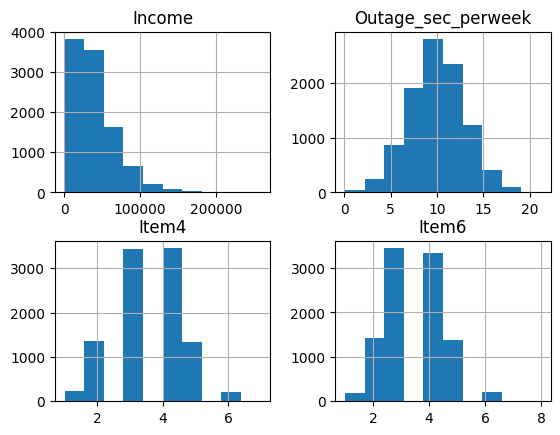

In [262]:
# Univariate Statistics Plots
# Variables being Plotted : Income, Outage_sec_perweek, Item4 (Reliability), Item6 (Respectful Response)

# Identify Distribution of Variables
stats_df = df[['Income', 'Outage_sec_perweek','Item4','Item6']]
stats_df.hist()

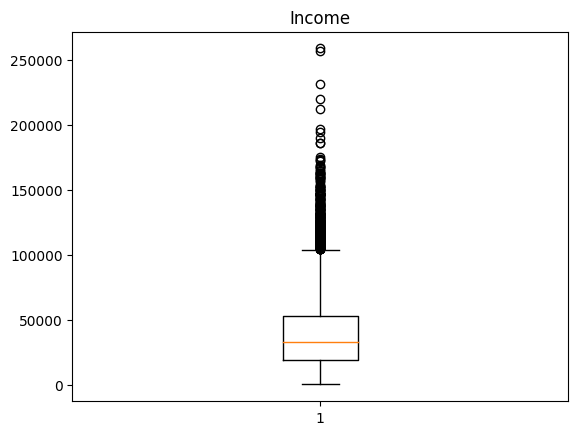

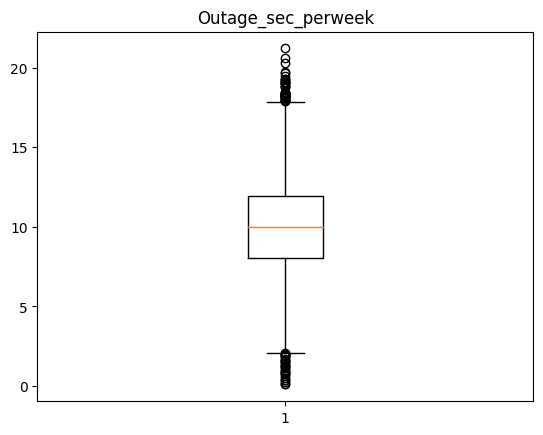

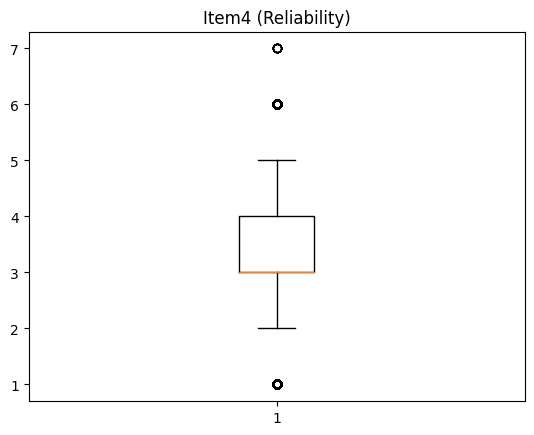

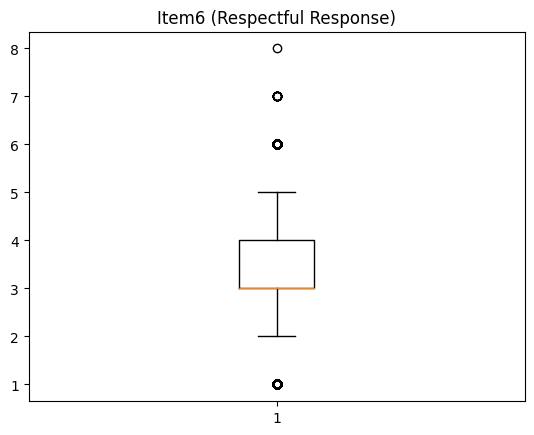

,Income,Outage_sec_perweek,Item4,Item6
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,39806.926771,10.001848,3.497500,3.497300
std,28199.916702,2.976019,1.025816,1.033586
min,348.670000,0.099747,1.000000,1.000000
25%,19224.717500,8.018214,3.000000,3.000000
50%,33170.605000,10.018560,3.000000,3.000000
75%,53246.170000,11.969485,4.000000,4.000000
max,258900.700000,21.207230,7.000000,8.000000


In [263]:
# Run Univariate Analysis on Variables

plt.boxplot(stats_df['Income'])
plt.title('Income')
plt.show()

plt.boxplot(stats_df['Outage_sec_perweek'])
plt.title('Outage_sec_perweek')
plt.show()

plt.boxplot(stats_df['Item4'])
plt.title('Item4 (Reliability)')
plt.show()

plt.boxplot(stats_df['Item6'])
plt.title('Item6 (Respectful Response)')
plt.show()

stats_df.describe()

## Bivariate Analysis

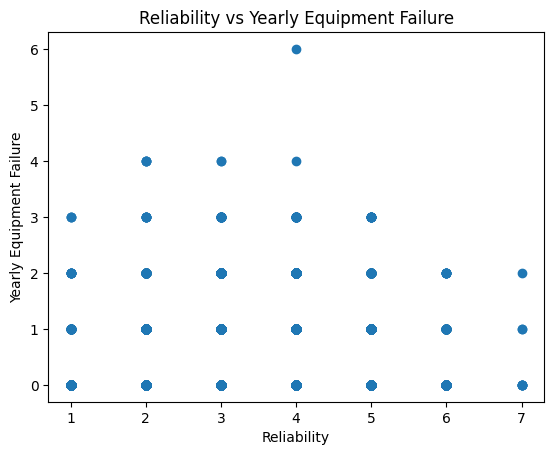

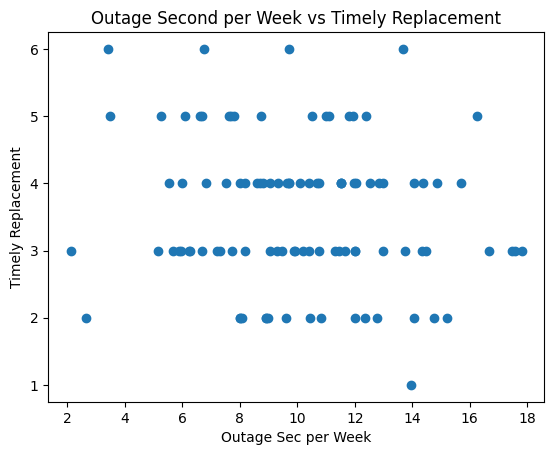

In [264]:
# Univariate Statistics Plots
# Variables being Plotted : Yearly_equip_failure, Outage_sec_perweek, Item3 (Timely Replacements), Item4 (Reliability)

# Identify the Correlation of Variables Using Scatter Plot
plt.scatter(df['Item4'], df['Yearly_equip_failure'])
plt.title('Reliability vs Yearly Equipment Failure')
plt.xlabel('Reliability')
plt.ylabel('Yearly Equipment Failure')
plt.show()

plt.scatter(df['Outage_sec_perweek'].sample(100), df['Item3'].sample(100))
plt.title('Outage Second per Week vs Timely Replacement')
plt.xlabel('Outage Sec per Week')
plt.ylabel('Timely Replacement')
plt.show()

<Axes: >

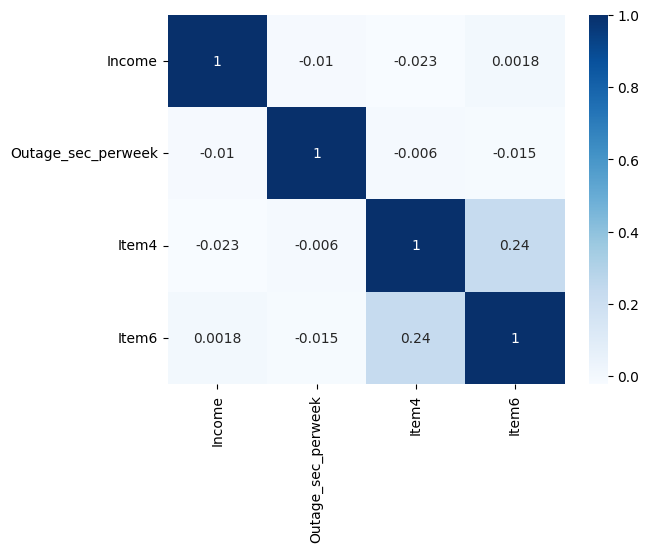

In [265]:
corr = stats_df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

## References
1. https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/ (Bivariate graphing)
2. https://passel2.unl.edu/view/lesson/9beaa382bf7e/14 (Limitations of Chi_Squared Test)
3. https://soc.utah.edu/sociology3112/chi-square.php (More Limitations of Chi-Squared Test)
4. https://www.statology.org/univariate-analysis/#:~:text=The%20term%20univariate%20analysis%20refers%20to%20the%20analysis,following%3A%20Bivariate%20Analysis%3A%20The%20analysis%20of%20two%20variables.(Univariate analysis)
5. https://www.statology.org/bivariate-analysis/ (Bivariate Analysis)
6. https://byjus.com/maths/covariance/ (Covariance Explanation)
